In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

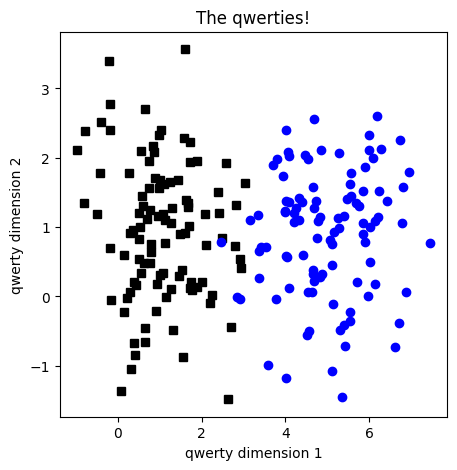

In [7]:
nPerClust = 100
blur = 1

A = [1,1]
B = [5,1]

a = [A[0] + np.random.randn(nPerClust)*blur, A[1] + np.random.randn(nPerClust)*blur]
b = [B[0] + np.random.randn(nPerClust)*blur, B[1] + np.random.randn(nPerClust)*blur]

labels_np = np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust, 1))))

data_np = np.hstack((a,b)).T

labels = torch.tensor(labels_np).float()
data = torch.tensor(data_np).float()

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], 'ks')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], 'bo')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

Sequential

In [13]:
ann = nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU(),
    nn.Linear(1,1),
    nn.Sigmoid()
)
ann

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

Class

In [12]:
class ANN(nn.Module):
  def __init__(self):
    super().__init__()

    self.input = nn.Linear(2,1)
    self.output = nn.Linear(1,1)

  def forward(self, x):
    x = self.input(x)
    x = F.relu(x)
    x = self.output(x)
    x = torch.sigmoid(x)
    return x

ann = ANN()
ann

ANN(
  (input): Linear(in_features=2, out_features=1, bias=True)
  (output): Linear(in_features=1, out_features=1, bias=True)
)

In [17]:
lr = 0.01
lossfn = nn.BCELoss()
optimizer = torch.optim.SGD(ann.parameters(), lr = lr)
numEpochs = 1000
losses = torch.zeros(numEpochs)

for epochi in range(numEpochs):
  yHat = ann(data)
  loss = lossfn(yHat, labels)
  losses[epochi] = loss

  if epochi%10==0:
    print(f'Epoch: {epochi}, Loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0, Loss: 0.2462092936038971
Epoch: 10, Loss: 0.2447481006383896
Epoch: 20, Loss: 0.24330390989780426
Epoch: 30, Loss: 0.24187640845775604
Epoch: 40, Loss: 0.24046531319618225
Epoch: 50, Loss: 0.23907026648521423
Epoch: 60, Loss: 0.23769104480743408
Epoch: 70, Loss: 0.2363274246454239
Epoch: 80, Loss: 0.23497901856899261
Epoch: 90, Loss: 0.2336457371711731
Epoch: 100, Loss: 0.23232723772525787
Epoch: 110, Loss: 0.23102329671382904
Epoch: 120, Loss: 0.2297336757183075
Epoch: 130, Loss: 0.22845815122127533
Epoch: 140, Loss: 0.2271965742111206
Epoch: 150, Loss: 0.22594872117042542
Epoch: 160, Loss: 0.2247142642736435
Epoch: 170, Loss: 0.22349309921264648
Epoch: 180, Loss: 0.22228504717350006
Epoch: 190, Loss: 0.22108988463878632
Epoch: 200, Loss: 0.21990741789340973
Epoch: 210, Loss: 0.21873751282691956
Epoch: 220, Loss: 0.2175799161195755
Epoch: 230, Loss: 0.21643829345703125
Epoch: 240, Loss: 0.2153167873620987
Epoch: 250, Loss: 0.21420688927173615
Epoch: 260, Loss: 0.213117390871

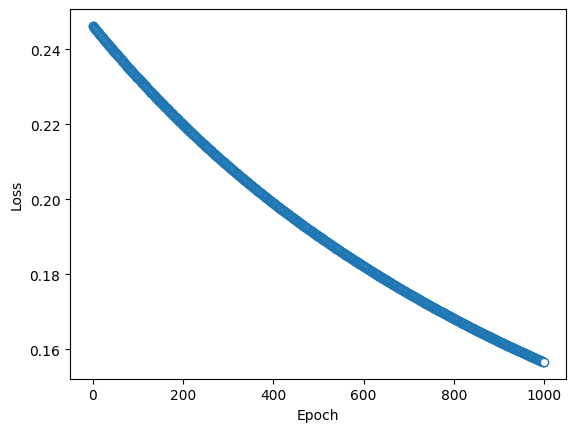

In [18]:
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

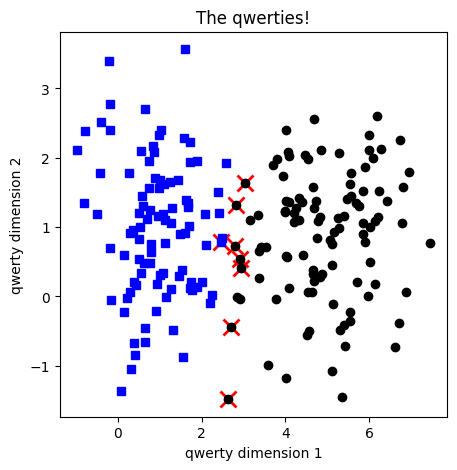

In [32]:
predictions = ann(data)
predlabels = predictions>.5
misclassified = np.where(predlabels != labels)[0]
totalacc = 100-100*len(misclassified)/(2*nPerClust)

fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified, 0], data[misclassified, 1], 'rx', markersize=12, markeredgewidth=2)
plt.plot(data[np.where(~predlabels)[0],0], data[np.where(~predlabels)[0],1], 'bs')
plt.plot(data[np.where(predlabels)[0],0], data[np.where(predlabels)[0],1], 'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()